In [17]:


from pyspark.sql import SparkSession

# Set the configuration parameter to "LEGACY"
spark = SparkSession.builder \
    .appName("Sentiment Analysis") \
    .config("spark.sql.legacy.timeParserPolicy", "LEGACY") \
    .getOrCreate()


In [6]:
# spark = SparkSession.builder \
#     .appName("Sentiment Analysis") \
#     .getOrCreate()


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/07/25 05:52:49 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [18]:
data_path = "/home/sara/Documents/archive/training.1600000.processed.noemoticon.csv"
df = spark.read.csv(data_path, inferSchema=True, header=None)


In [19]:
df = df.withColumnRenamed("_c0", "sentiment").withColumnRenamed("_c1", "id").withColumnRenamed("_c2", "date") \
    .withColumnRenamed("_c3", "query").withColumnRenamed("_c4", "user").withColumnRenamed("_c5", "tweet")


In [20]:
df.printSchema()
df.show(5)

root
 |-- sentiment: integer (nullable = true)
 |-- id: long (nullable = true)
 |-- date: string (nullable = true)
 |-- query: string (nullable = true)
 |-- user: string (nullable = true)
 |-- tweet: string (nullable = true)

+---------+----------+--------------------+--------+---------------+--------------------+
|sentiment|        id|                date|   query|           user|               tweet|
+---------+----------+--------------------+--------+---------------+--------------------+
|        0|1467810369|Mon Apr 06 22:19:...|NO_QUERY|_TheSpecialOne_|@switchfoot http:...|
|        0|1467810672|Mon Apr 06 22:19:...|NO_QUERY|  scotthamilton|is upset that he ...|
|        0|1467810917|Mon Apr 06 22:19:...|NO_QUERY|       mattycus|@Kenichan I dived...|
|        0|1467811184|Mon Apr 06 22:19:...|NO_QUERY|        ElleCTF|my whole body fee...|
|        0|1467811193|Mon Apr 06 22:19:...|NO_QUERY|         Karoli|@nationwideclass ...|
+---------+----------+--------------------+--------+--

In [21]:
from pyspark.sql.functions import length
df.withColumn("tweet_length", length("tweet")).agg({"tweet_length": "avg"}).show()


[Stage 36:>                                                         (0 + 8) / 8]



+-----------------+
|avg(tweet_length)|
+-----------------+
|     74.041759375|
+-----------------+



In [7]:
# spark.stop()

In [22]:
df.show(5)

+---------+----------+--------------------+--------+---------------+--------------------+
|sentiment|        id|                date|   query|           user|               tweet|
+---------+----------+--------------------+--------+---------------+--------------------+
|        0|1467810369|Mon Apr 06 22:19:...|NO_QUERY|_TheSpecialOne_|@switchfoot http:...|
|        0|1467810672|Mon Apr 06 22:19:...|NO_QUERY|  scotthamilton|is upset that he ...|
|        0|1467810917|Mon Apr 06 22:19:...|NO_QUERY|       mattycus|@Kenichan I dived...|
|        0|1467811184|Mon Apr 06 22:19:...|NO_QUERY|        ElleCTF|my whole body fee...|
|        0|1467811193|Mon Apr 06 22:19:...|NO_QUERY|         Karoli|@nationwideclass ...|
+---------+----------+--------------------+--------+---------------+--------------------+
only showing top 5 rows



In [23]:
# Import necessary libraries
from pyspark.sql.functions import length

# Calculate the average tweet length
df = df.withColumn("tweet_length", length("tweet"))
avg_tweet_length = df.agg({"tweet_length": "avg"}).collect()[0][0]
print("Average tweet length:", avg_tweet_length)

# Count positive and negative sentiment tweets
positive_tweets_count = df.filter(df["sentiment"] == 4).count()
negative_tweets_count = df.filter(df["sentiment"] == 0).count()
print("Positive tweets count:", positive_tweets_count)
print("Negative tweets count:", negative_tweets_count)

# Calculate correlation coefficient between sentiment and tweet length
correlation = df.corr("sentiment", "tweet_length")
print("Correlation coefficient between sentiment and tweet length:", correlation)


Average tweet length: 74.041759375


Positive tweets count: 800000
Negative tweets count: 800000


Correlation coefficient between sentiment and tweet length: -0.006329064433864042


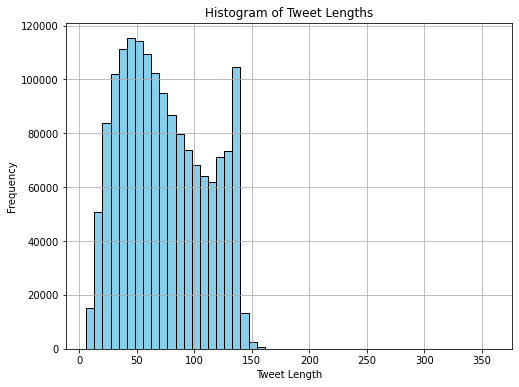

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Collect the data as a Pandas DataFrame for plotting
tweet_lengths = df.select("tweet_length").toPandas()

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(tweet_lengths["tweet_length"], bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Tweet Length")
plt.ylabel("Frequency")
plt.title("Histogram of Tweet Lengths")
plt.grid(True)
plt.show()


Average tweet length: 74.041759375


Positive tweets count: 800000
Negative tweets count: 800000


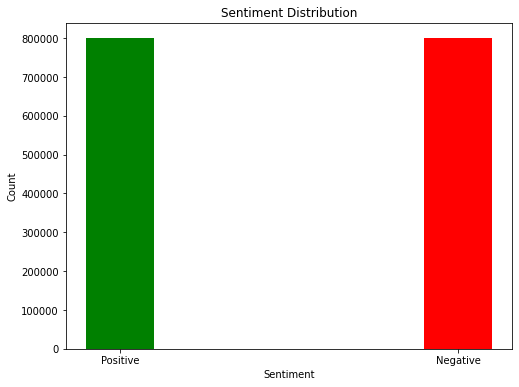

23/07/25 06:14:21 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/07/25 06:14:21 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/07/25 06:14:33 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/07/25 06:14:33 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


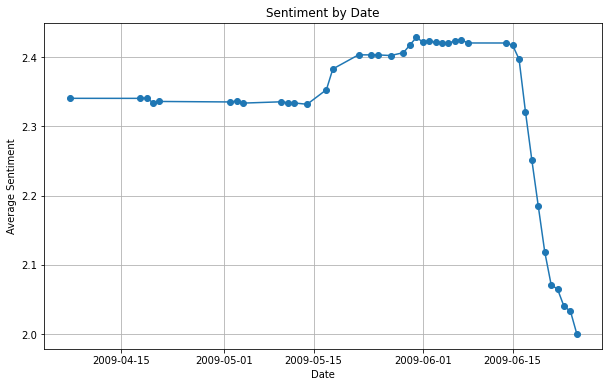

In [25]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import to_date, avg
from pyspark.sql import Window

# Calculate the average tweet length
df = df.withColumn("tweet_length", length("tweet"))
avg_tweet_length = df.agg({"tweet_length": "avg"}).collect()[0][0]
print("Average tweet length:", avg_tweet_length)

# Count positive and negative sentiment tweets
positive_tweets_count = df.filter(df["sentiment"] == 4).count()
negative_tweets_count = df.filter(df["sentiment"] == 0).count()
print("Positive tweets count:", positive_tweets_count)
print("Negative tweets count:", negative_tweets_count)

# Sentiment Distribution: Visualize the distribution of positive and negative sentiment tweets
sentiment_counts = df.groupBy("sentiment").count().collect()
sentiment_labels = [row["sentiment"] for row in sentiment_counts]
tweet_counts = [row["count"] for row in sentiment_counts]

plt.figure(figsize=(8, 6))
plt.bar(sentiment_labels, tweet_counts, color=['green', 'red'])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")
plt.xticks(sentiment_labels, ['Positive', 'Negative'])
plt.show()

# Sentiment by Date: Analyze how sentiment changes over time
df = df.withColumn("date", to_date("date", "EEE MMM dd HH:mm:ss zzz yyyy"))

# Calculate average sentiment for each date
window_spec = Window.orderBy("date")
df = df.withColumn("avg_sentiment", avg("sentiment").over(window_spec))

# Group by date and calculate the average sentiment for each day
sentiment_by_date = df.groupBy("date").agg(avg("avg_sentiment").alias("average_sentiment")).collect()

# Convert the results to Pandas DataFrame for visualization
sentiment_by_date_df = pd.DataFrame(sentiment_by_date, columns=["date", "average_sentiment"])

plt.figure(figsize=(10, 6))
plt.plot(sentiment_by_date_df["date"], sentiment_by_date_df["average_sentiment"], marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Average Sentiment")
plt.title("Sentiment by Date")
plt.grid(True)
plt.show()


In [1]:
print(1)

1
